In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('car-data-analysis')
jovian.set_colab_id('1qDDInVoG-fdp6FE2AZW4qH-woEg_OKDe')

# car-data-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="car-data-analysis")

In [1]:
pip install opendatasets --upgrade

In [2]:
!pip install dataprep

     |████████████████████████████████| 9.5 MB 13.9 MB/s 
     |████████████████████████████████| 965 kB 48.4 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 943 kB 64.6 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 749 kB 58.5 MB/s 
     |████████████████████████████████| 133 kB 51.1 MB/s 
     |████████████████████████████████| 1.1 MB 44.8 MB/s 
     |████████████████████████████████| 10.9 MB 39.6 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 366 kB 62.3 MB/s 
     |████████████████████████████████| 1.5 MB 47.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 271 kB 73.9 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |█████

In [50]:
#importing required libraries
import opendatasets as od
from dataprep.eda import create_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split

In [6]:
dataset_url = 'https://www.kaggle.com/datasets/harikrishnareddyb/used-car-price-predictions'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjayyanadi
Your Kaggle Key: ··········


100%|██████████| 17.2M/17.2M [00:00<00:00, 45.3MB/s]


In [7]:
data_filename='./used-car-price-predictions/true_car_listings.csv'

In [8]:
df=pd.read_csv(data_filename)

In [9]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [11]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [12]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [13]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [14]:
df.drop(['Vin'],axis=1,inplace=True)

In [15]:
df['current_Age'] = pd.datetime.now().year - df['Year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [17]:
df

,Price,Year,Mileage,City,State,Make,Model,current_Age
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,8
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,9
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,9
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,8
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,6
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,Volvo,S90T6,5
852118,72260,2017,3201,Englewood,NJ,Volvo,XC90T6,5
852119,55999,2016,28941,Fort Collins,CO,Volvo,XC90AWD,6
852120,60240,2017,3005,San Leandro,CA,Volvo,V90,5


In [20]:
# maximum price
df[df['Price']==df['Price'].max()]

,Price,Year,Mileage,City,State,Make,Model,current_Age
622265,499500,2014,3260,Westville,NJ,Mercedes-Benz,SLS,8


In [21]:
df[df['Price']==df['Price'].min()]

,Price,Year,Mileage,City,State,Make,Model,current_Age
64010,1500,2002,107885,Philadelphia,PA,Buick,Century4dr,20
64965,1500,1998,100296,Levittown,PA,Buick,Century4dr,24
67075,1500,1998,177213,South Jordan,UT,Buick,Park,24
68710,1500,1999,160000,Newark,NJ,Buick,Regal4dr,23
102581,1500,2009,129703,Lakewood,NJ,Chevrolet,Aveo4dr,13
...,...,...,...,...,...,...,...,...
699677,1500,2004,220147,Hillsdale,MI,Pontiac,Grand,18
725042,1500,2001,171087,Medina,OH,Saturn,SC,21
799006,1500,1997,274907,Newark,NJ,Toyota,Camry4dr,25
838989,1500,2001,136301,McCook,IL,Volkswagen,New,21


DataPrep Report
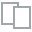
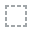
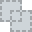
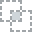
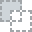
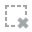
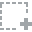
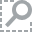
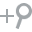
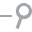
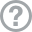
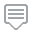
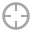
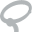
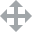
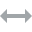
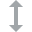
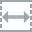
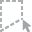
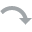
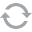
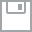
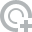
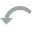
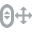
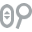
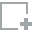
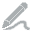
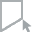
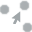
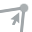
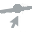

In [23]:
create_report(df)

In [31]:
#converting object to int type
con_df = ['State','City','Make','Model'] 
encoder = preprocessing.LabelEncoder()
encoded = df[con_df].apply(encoder.fit_transform)
df.drop(con_df, axis=1, inplace=True)
df = pd.concat([encoded,df],axis = 1) 
df.head(10)

,State,City,Make,Model,Price,Year,Mileage,current_Age
0,49,646,1,1194,8995,2014,35725,8
1,39,1260,1,1193,10888,2013,19606,9
2,49,646,1,1194,8995,2013,48851,9
3,6,2490,1,1193,10999,2014,39922,8
4,50,1231,1,1196,14799,2016,22142,6
5,11,1397,1,2249,7989,2012,105246,10
6,39,888,1,2252,14490,2014,34032,8
7,50,2429,1,2248,13995,2013,32384,9
8,7,2389,1,1194,10495,2013,57596,9
9,49,646,1,1193,9995,2013,63887,9


In [32]:
df.nunique()

State              59
City             2553
Make               58
Model            2736
Price           47124
Year               22
Mileage        158836
current_Age        22
dtype: int64

In [33]:
df.describe()

,State,City,Make,Model,Price,Year,Mileage,current_Age
count,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,8.521220e+05,852122.000000
mean,27.790470,1236.200420,25.485920,1275.129538,21464.100210,2013.289145,5.250779e+04,8.710855
std,17.240295,719.800137,16.326228,766.350252,13596.202241,3.414987,4.198896e+04,3.414987
min,0.000000,0.000000,0.000000,0.000000,1500.000000,1997.000000,5.000000e+00,4.000000
25%,11.000000,595.000000,11.000000,651.000000,13000.000000,2012.000000,2.383600e+04,6.000000
50%,27.000000,1220.000000,21.000000,1158.000000,18500.000000,2014.000000,4.025600e+04,8.000000
75%,44.000000,1852.000000,41.000000,2074.000000,26995.000000,2016.000000,7.218600e+04,10.000000
max,58.000000,2552.000000,57.000000,2735.000000,499500.000000,2018.000000,2.856196e+06,25.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21651d8e50>,
      dtype=object)

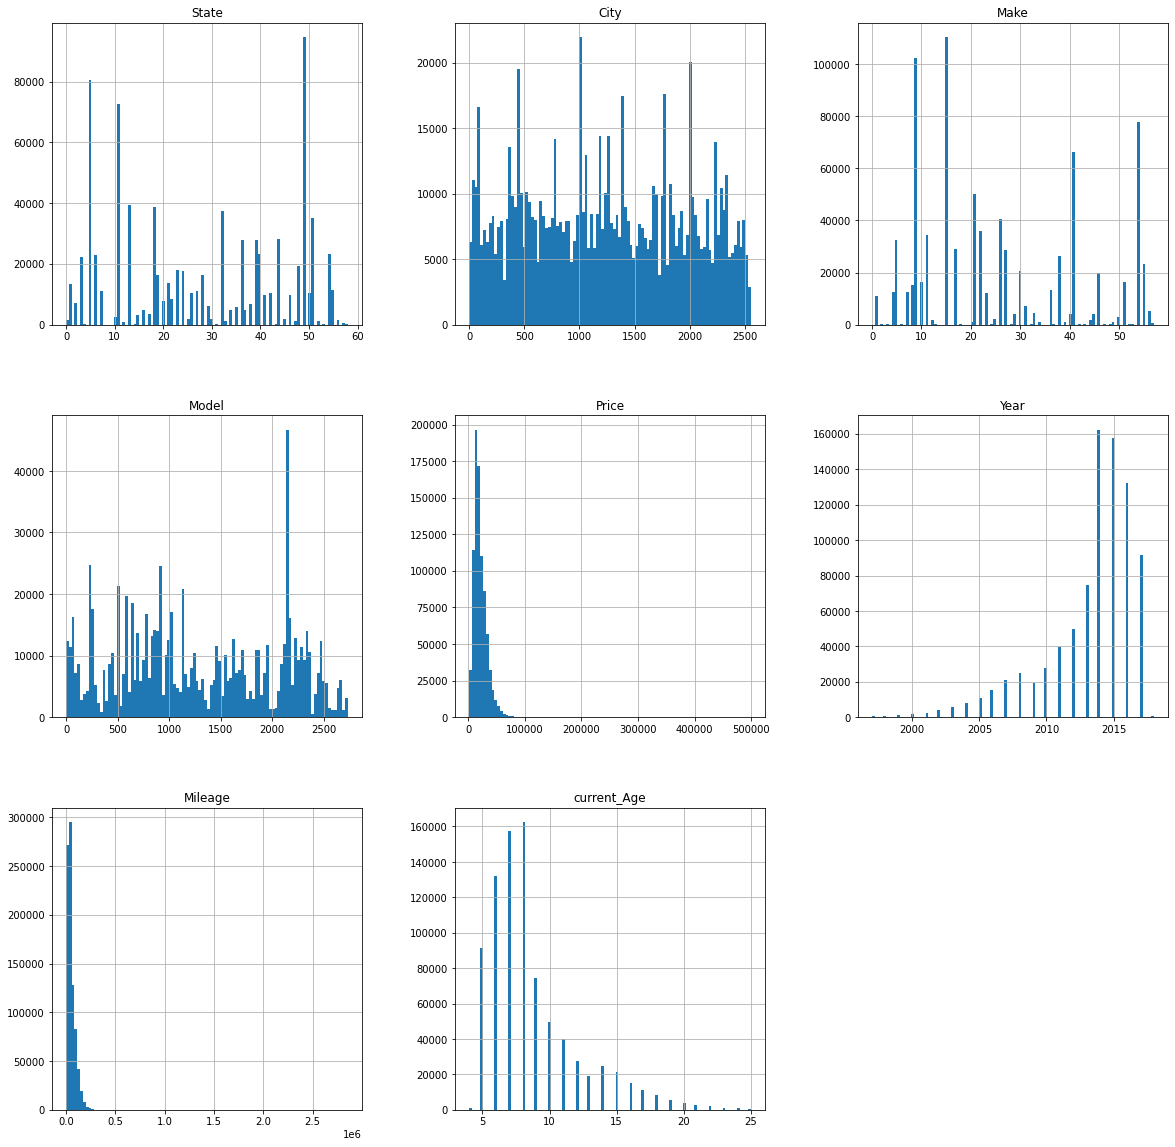

In [34]:
df.hist(bins= 100, figsize = (20,20))

<Figure size 1080x1080 with 0 Axes>

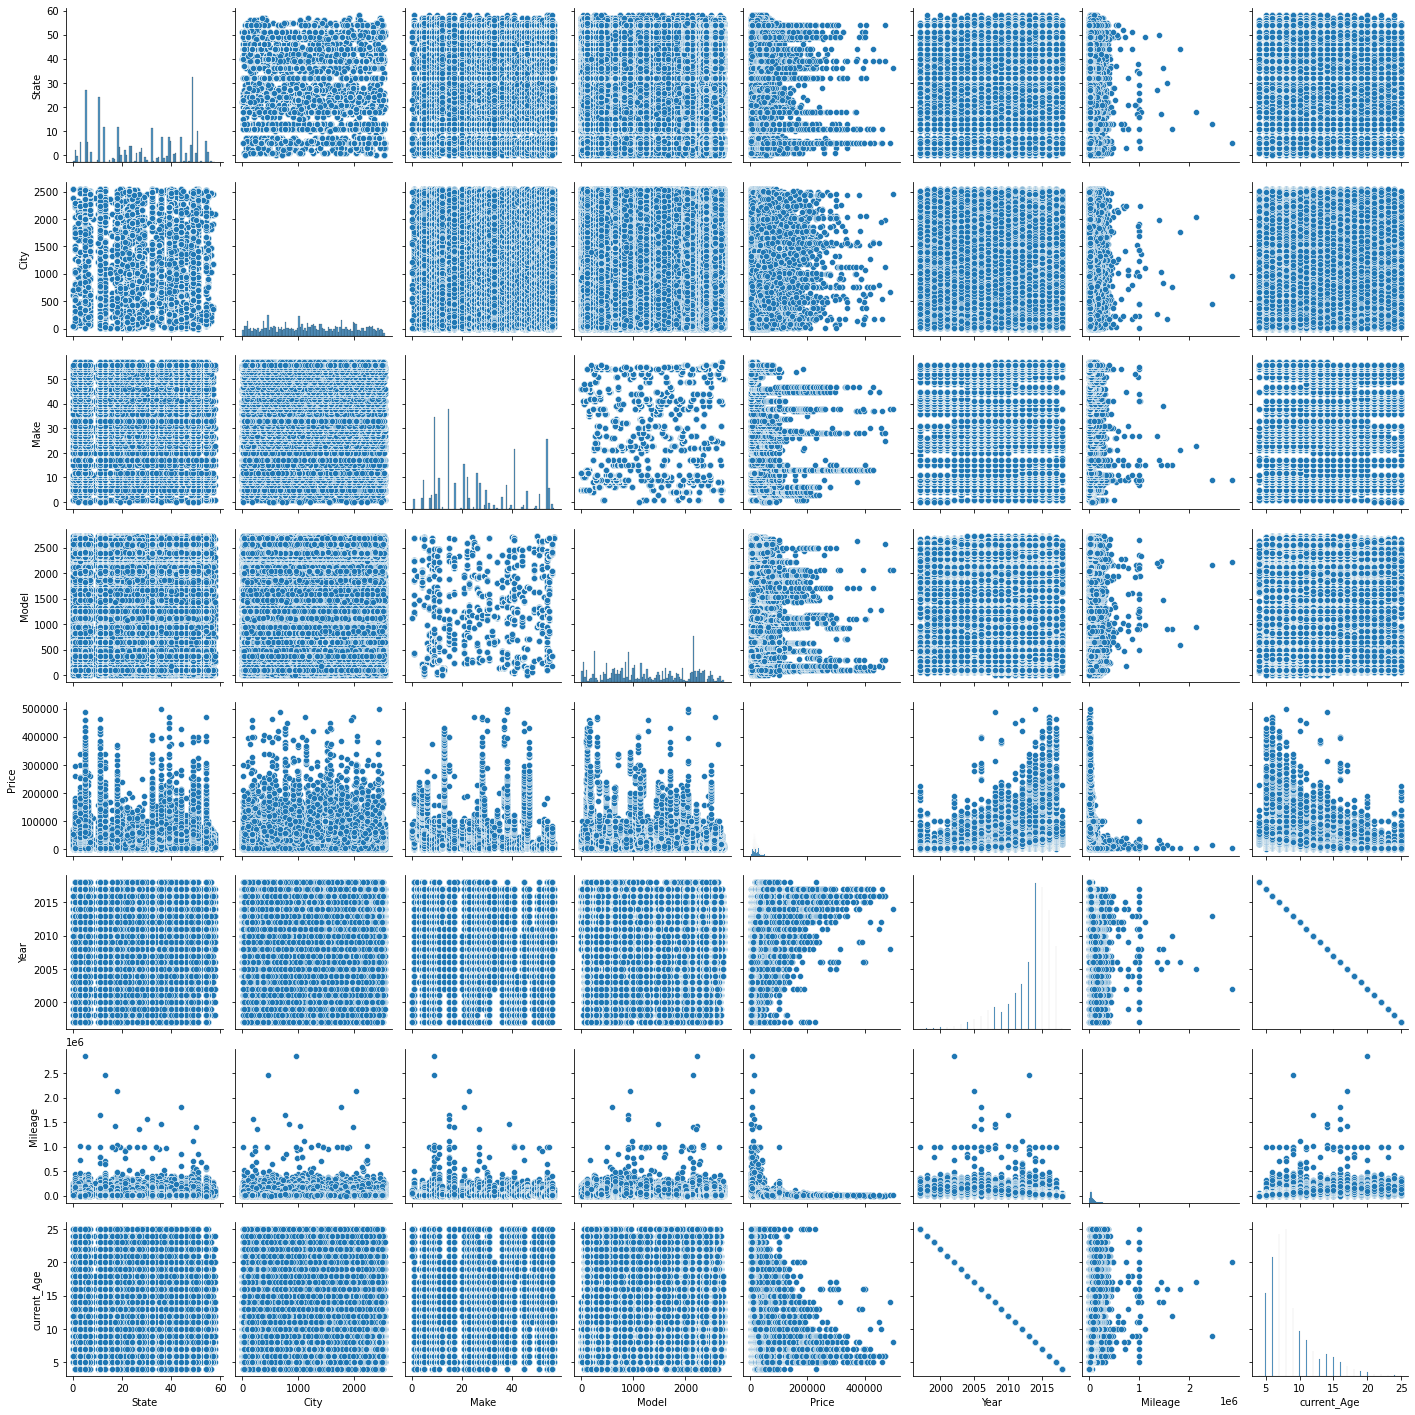

In [38]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


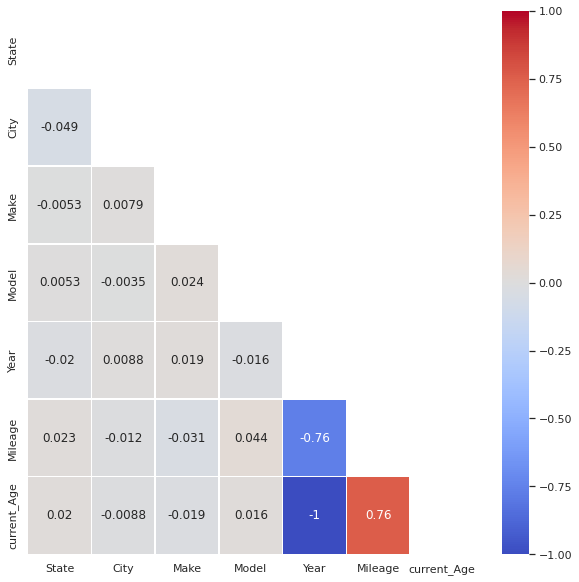

In [92]:
#Checking high correlated features with price
corr = df.drop(columns = ['Price']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, vmax=1, center=0, linewidths=.5, annot = True,cmap='coolwarm')

In [86]:
#linear model w.R.T year,mileage
X = df[['Year', 'Mileage']].values
y = df['Price'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [67]:
# create linear regression object
reg = linear_model.LinearRegression()

In [54]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [89]:
# regression coefficients
reg.coef_

array([ 7.49776546e+02, -8.99756439e-02])

In [88]:
# variance score
reg.score(X_test, y_test)

0.1911621962093618

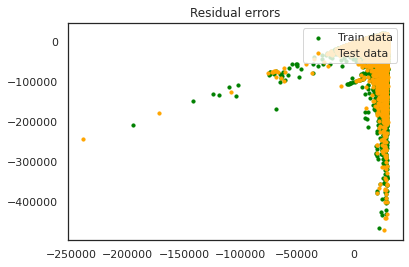

In [62]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "orange", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
#legend
plt.legend(loc = 'upper right')
 
# plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [85]:
#linear model w.R.T year,age,mileage,model,state
X1 = df[['Year','current_Age','Mileage','Model','State']].values
y1 = df['Price'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [78]:
reg = linear_model.LinearRegression()

In [79]:
reg.fit(X_train, y_train)

LinearRegression()

In [90]:
# regression coefficients
reg.coef_

array([ 7.49776546e+02, -8.99756439e-02])

In [91]:
# variance score
reg.score(X_test, y_test)

0.1911621962093618

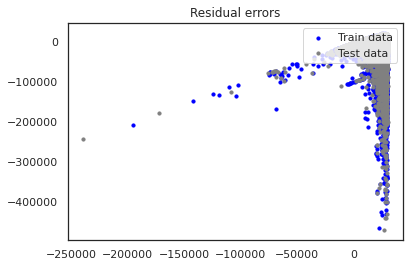

In [83]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "blue", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "grey", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
#legend
plt.legend(loc = 'upper right')
 
# plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

variace score is 0.19 where it should be nearly at 1.0
the model is succussfully generated but it predicts prices with less accuraacy.
if ther is any other scenario's let me know.
thank you.